In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the images to [0, 1] range
x_train, x_test = x_train / 255.0, x_test / 255.0


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


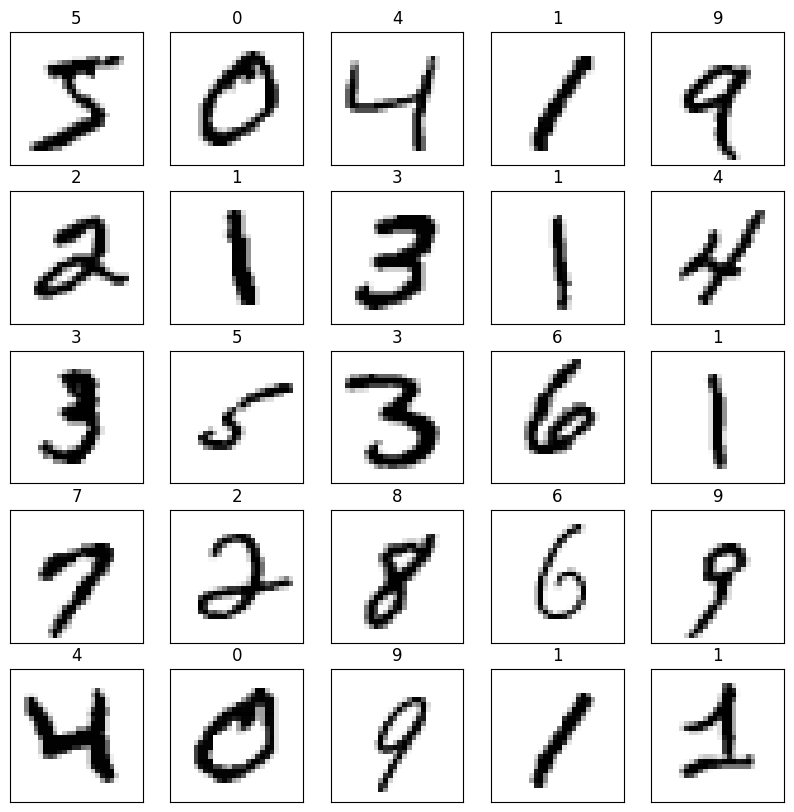

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.title(y_train[i])
plt.show()



In [ ]:
model = models.Sequential([
    # First convolutional layer with 32 filters and 3x3 kernel
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),  # Max pooling layer

    # Second convolutional layer
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Flattening layer to connect with fully connected layers
    layers.Flatten(),

    # Fully connected layers
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # Output layer with 10 classes (0-9)
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
# Reshape the data to add channel dimension (since CNN expects 3D input: height, width, channels)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Train the model
model.fit(x_train, y_train, epochs=5)



Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 62s 32ms/step - accuracy: 0.9042 - loss: 0.3075
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 31ms/step - accuracy: 0.9843 - loss: 0.0485
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 31ms/step - accuracy: 0.9906 - loss: 0.0300
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 62s 33ms/step - accuracy: 0.9926 - loss: 0.0221
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 58s 31ms/step - accuracy: 0.9943 - loss: 0.0171


In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.9850 - loss: 0.0388
Test accuracy: 0.9890999794006348


In [ ]:
predictions = model.predict(x_test)

# To see the prediction for the first test image
import numpy as np
print(f"Predicted label: {np.argmax(predictions[0])}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step
Predicted label: 7


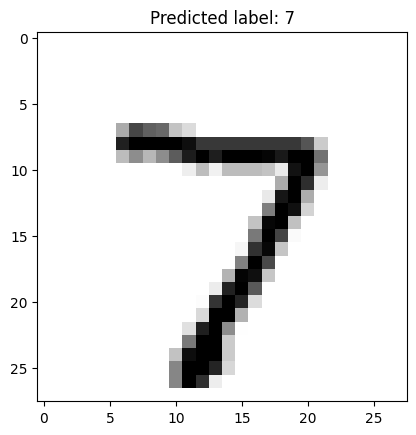

In [ ]:
# Plot the first test image and its predicted label
plt.imshow(x_test[0].reshape(28, 28), cmap=plt.cm.binary)
plt.title(f"Predicted label: {np.argmax(predictions[0])}")
plt.show()
